<a href="https://colab.research.google.com/github/bab81/AI-Algorithms/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI Project

## 0. Import from PDF


### Install dependency - ghostscript

In [ ]:
!apt install ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common
  libidn11 libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 10 newly installed, 0 to remove and 24 not upgraded.
Need to get 12.7 MB of archives.
After this operation, 51.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 fonts-droid-fallback all 1:6.0.1r16-1.1 [1,805 kB]
Get:2 h

### Install dependency ghostscript python

In [ ]:
!pip install ghostscript

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Install dependency - camelot-py

In [ ]:
!pip --no-cache-dir install camelot-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.8/248.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 127.7 MB/s eta 0:00:00


###Import libraries and modules

In [ ]:
import pandas as pd
import camelot
import numpy as np
import re

# for data processing and manipulation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#importing different models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans

# for evaluating models
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# for making charts
import matplotlib.pyplot as plt
import seaborn as sns

### Import PDF
The original is at https://cabinet.gov.pk/SiteImage/Misc/files/TOSHAKHANA/Procedures/TK-Record.pdf

**Note:** this is almost a 450-page document that takes 10+ min to be read

In [ ]:
#tables = camelot.read_pdf('TK-Record.pdf', pages='2')
tables = camelot.read_pdf('TK-Record.pdf', pages='all') # beware - this takes 10+ min to run

### Convert to Dataframe

In [ ]:
df = pd.DataFrame()
for table in tables:  
    df = pd.concat([df, table.df.drop([0])], axis=0, ignore_index=True) 
    # Note: drop the repeating header (i.e. first row for each df-page)

### Make backup copy of the dataframe

In [ ]:
df_orig = df.copy() 

In [ ]:
df

,0,1,2,3,4,5,6
0,1.,Two \nsmall \nsilver \nBowls,"Mr. Abdul Sattar, Minister for Foreign \n...",08-01-2002,"Rs.5,000/-",Free of cost,Retained
1,2.,One Pilot Pen with \nink,"Mr. Abdul Sattar, Minister for Foreign \n...",08-01-2002,"Rs.3,500/-",Free of cost,Retained
2,3.,One silver vase,"Mr. Shaukat Aziz, Minister for Finance",09-01-2002,"Rs.7,500/-",Free of cost,Retained
3,4.,One \n(decoration) \nfolding Screen,"Mr. Abdul Sattar, Minister for Foreign \n...",15-01-2002,"Rs.2,200/-",Free of cost,Retained
4,5.,One \nDecoration \nPiece,"Mr. Abdul Sattar, Minister for Foreign \n...",22-01-2002,"Rs.2,000/-",Free of cost,Retained
...,...,...,...,...,...,...,...
4580,55.,One Ladies Dupatta \nOne Key Chain \nOne Card ...,First Lady of Pakistan,28-02-2023,,,In process
4581,56.,One Rug/Carpet,"Mr. Asad Majeed Khan, Foreign \nSecretary",01-03-2023,,,In process
4582,57.,Two Ladies Suit,First Lady of Pakistan,02-03-2023,,,In process
4583,58.,One Fancy Dupatta \nOne Vase \nOne White Box ...,First Lady of Pakistan,02-03-2023,,,In process


## 1. Pre-process data (Data Cleansing) [20 points]

Check to see if data has gaps Nulls, N/A, None. Do you have anomalies (Outliers)?
Analyze the label (e.g., in classification, check to see if data is balanced)
Encode columns that contains text
Normalize numerical columns

In [ ]:
df.columns

RangeIndex(start=0, stop=7, step=1)

In [ ]:
#drop the first column as it as repeating serial number from the PDF file.
df.drop(df.columns[0:1],axis=1, inplace=True)

In [ ]:
#adjust the index, start at 1
df.index = np.arange(1, len(df) + 1)

### Adjust column names

In [ ]:
# Manually add the column names 
#df.columns = tables[0].df.iloc[0].tolist()
df.columns = ['Gift','Recipient','Date','Assessed_Value','Retention_Cost','Remarks']

In [ ]:
df.dtypes


Gift              object
Recipient         object
Date              object
Assessed_Value    object
Retention_Cost    object
Remarks           object
dtype: object

### Covert columns to String datatype - intermediary step

In [ ]:
#Change column data types
for col_name in df.columns:
  df[col_name] = df[col_name].astype('string')

In [ ]:
#Strip spaces at start and end
for col_name in df.columns:
  df[col_name] = df[col_name].str.strip()

In [ ]:
df.dtypes

Gift              string
Recipient         string
Date              string
Assessed_Value    string
Retention_Cost    string
Remarks           string
dtype: object

### Remove records without data

In [ ]:
#remove rows with empty strings '' - boolean indexing
for col_name in df.columns:
  df = df[df[col_name] != '']

In [ ]:
for col_name in df.columns:
    print('NAs in column', col_name, 'are: ',df[col_name].isna().sum())

NAs in column Gift are:  0
NAs in column Recipient are:  0
NAs in column Date are:  0
NAs in column Assessed_Value are:  0
NAs in column Retention_Cost are:  0
NAs in column Remarks are:  0


### Covert the 'Date' column to datetime datatype

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

In [ ]:
#drop incorrectly formatted date records
df=df.dropna(subset=['Date'])

In [ ]:
df.dtypes

Gift                      string
Recipient                 string
Date              datetime64[ns]
Assessed_Value            string
Retention_Cost            string
Remarks                   string
dtype: object

### Remove ',' from currency figure

In [ ]:
#remove ,
df['Assessed_Value'] = df['Assessed_Value'].str.replace(',', '', regex=False)

In [ ]:
df_bck = df.copy()

In [ ]:
#split multi line values into different columns
#split_columns = df['Assessed_Value'].str.split(pat="\n", expand=True) 
#split_columns = split_columns.add_prefix('Assessed_')
#num_splits = split_columns.shape[1]

### Clean up composite values (multi-line) and Add new features

In [ ]:
# split values with multiple lines (composite values) into multiple columns
# if Total is already included in the composite value, then extract the 'Total' value

for i, row in df.iterrows():
    if 'tot' in row['Assessed_Value'].lower() and ':' in row['Assessed_Value']: #look for 'tot'
      split_values = row['Assessed_Value'].split(':')
      df.at[i, 'Assessed_Raw'] = split_values[0]
      df.at[i, 'Assessed_Total'] = split_values[1]
    elif 'tot' in row['Assessed_Value'].lower() and ':' not in row['Assessed_Value']: #look for 'tot'
      df.at[i, 'Assessed_Total'] = row['Assessed_Value'].split('.')[1]
    elif 'tot' not in row['Assessed_Value'].lower() and '\n' in row['Assessed_Value']: #split multi-line values
      split_cols = re.split('\n|\t', row['Assessed_Value'])
      for isplit, val in enumerate(split_cols):
        df.loc[i, f'Assessed_{isplit+1}'] = val.strip()
    else: # single value, retain it
      df.at[i, 'Assessed_Total'] = row['Assessed_Value']
  
    # add new feature, Gender
    gender_str = [ 'ms.', 'mrs', 'begum', 'daughter', 'lady', 'miss', 'wife']
    if any(search_str in row['Recipient'].lower() for search_str in gender_str):
      df.at[i, 'Gender'] = 'F'
    else:
      df.at[i, 'Gender'] = 'M' 
    
    # add new feature, Department
    dept_str = [ 'admiral', 'marshal', 'navy', 'paf', 'army' , 'cdr', 'brig', 'capt', 'col', 'flt', 'general', 'gen.', 'maj']
    if any(search_str in row['Recipient'].lower() for search_str in dept_str):
      df.at[i, 'Dept'] = 'Military'
    else:
      df.at[i, 'Dept'] = 'Civilian'
    
    # add new feature, Level
    level_str = [ 'hav', 'nk', 'n/k', 'sep', 'cons']
    if any(search_str in row['Recipient'].lower() for search_str in level_str):
      df.at[i, 'Level'] = 'Junior'
    else:
      df.at[i, 'Level'] = 'Senior'
  

In [ ]:
df.head()

,Gift,Recipient,Date,Assessed_Value,Retention_Cost,Remarks,Assessed_Total,Gender,Dept,Level,...,Assessed_11,Assessed_12,Assessed_13,Assessed_Raw,Assessed_14,Assessed_15,Assessed_16,Assessed_17,Assessed_18,Assessed_19
1,Two small silver Bowls,"Mr. Abdul Sattar, Minister for Foreign A...",2002-01-08,Rs.5000/-,Free of cost,Retained,5000,M,Civilian,Senior,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,One Pilot Pen with ink,"Mr. Abdul Sattar, Minister for Foreign A...",2002-01-08,Rs.3500/-,Free of cost,Retained,3500,M,Civilian,Senior,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,One silver vase,"Mr. Shaukat Aziz, Minister for Finance",2002-01-09,Rs.7500/-,Free of cost,Retained,7500,M,Civilian,Senior,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,One (decoration) folding Screen,"Mr. Abdul Sattar, Minister for Foreign A...",2002-01-15,Rs.2200/-,Free of cost,Retained,2200,M,Civilian,Senior,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5,One Decoration Piece,"Mr. Abdul Sattar, Minister for Foreign A...",2002-01-22,Rs.2000/-,Free of cost,Retained,2000,M,Civilian,Senior,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


### Fill null / NaN values

In [ ]:
df = df.fillna(0)

### Replace NCV with 0 from Assessed_ columns

In [ ]:
# replace NCV (No Cash Value) with 0
for z in range(1,20): #go through each column
   df['Assessed_'+str(z)] = df['Assessed_'+str(z)].str.replace('ncv', '0', case=False, regex=False)

### Extract numbers/digits using regular expression and store in a new column

In [ ]:
#extract numbers
for z in range(1,20):
  df['Assessed_'+str(z)] = df['Assessed_'+str(z)].str.replace('\D+', '', regex=True)
df['Assessed_Total'] = df['Assessed_Total'].str.replace('\D+', '', regex=True)  

### Change column datatype to numeric

In [ ]:
#change to numeric
for z in range(1,20):
   df['Assessed_'+str(z)] = pd.to_numeric(df['Assessed_'+str(z)])

df['Assessed_Total'] = pd.to_numeric(df['Assessed_Total'])


In [ ]:
df = df.fillna(0)

In [ ]:
df.head()

,Gift,Recipient,Date,Assessed_Value,Retention_Cost,Remarks,Assessed_Total,Gender,Dept,Level,...,Assessed_11,Assessed_12,Assessed_13,Assessed_Raw,Assessed_14,Assessed_15,Assessed_16,Assessed_17,Assessed_18,Assessed_19
1,Two small silver Bowls,"Mr. Abdul Sattar, Minister for Foreign A...",2002-01-08,Rs.5000/-,Free of cost,Retained,5000.0,M,Civilian,Senior,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,One Pilot Pen with ink,"Mr. Abdul Sattar, Minister for Foreign A...",2002-01-08,Rs.3500/-,Free of cost,Retained,3500.0,M,Civilian,Senior,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,One silver vase,"Mr. Shaukat Aziz, Minister for Finance",2002-01-09,Rs.7500/-,Free of cost,Retained,7500.0,M,Civilian,Senior,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,One (decoration) folding Screen,"Mr. Abdul Sattar, Minister for Foreign A...",2002-01-15,Rs.2200/-,Free of cost,Retained,2200.0,M,Civilian,Senior,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,One Decoration Piece,"Mr. Abdul Sattar, Minister for Foreign A...",2002-01-22,Rs.2000/-,Free of cost,Retained,2000.0,M,Civilian,Senior,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculate total assessed value (sum across columns)

In [ ]:
#make a list of column names that are to be added up
column_names = []
for z in range(1,20):
   column_names.append("Assessed_"+str(z))
#sum the colums that were split. 
df['Assessed_Total_Final'] = df[column_names].sum(axis=1) + df['Assessed_Total']


### Drop unneccassary columns

In [ ]:
df = df.drop(column_names, axis=1)
df = df.drop(['Assessed_Value', 'Assessed_Raw', 'Assessed_Total'], axis=1)


### Add Label column ('Retained')

In [ ]:
df['Retained'] = np.where(df['Remarks'].str.contains('etain'), 'Y', 'N')


In [ ]:
df.tail()

,Gift,Recipient,Date,Retention_Cost,Remarks,Gender,Dept,Level,Assessed_Total_Final,Retained
4475,One Calligraphy duly framed,"SP Mahzoor Ali Ghauri, Chief Security Of...",2022-10-20,"Rs.6,000/-","Amount deposited, gift retained",M,Civilian,Senior,42000.0,Y
4476,Set with a. Torsyk silver Tray b. Book c...,"Mian Muhammad Shehbaz Sharif, Prime Minist...",2022-10-20,-,S.No.(a) displayed at Prime Minister House...,M,Civilian,Senior,85000.0,N
4477,One Carved wood panel,"Mian Muhammad Shehbaz Sharif, Prime Minist...",2022-10-20,-,Deposited in Toshakhana,M,Civilian,Senior,50000.0,N
4478,a. One Book b. One Book c. One Insignia,"Ms. Marriyum Aurangzeb, Minister of Inform...",2022-10-24,Free of cost,In process,F,Civilian,Senior,9000.0,N
4479,Blanc a. One Mont Brief Case Blanc b. O...,"Mr. Bilawal Bhutto Zardari, Minister for F...",2022-10-24,-,Deposited in Toshakhana,M,Civilian,Senior,434000.0,N


### Extract Year and Month from the Datetime column

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114 entries, 1 to 4479
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Gift                  4114 non-null   string        
 1   Recipient             4114 non-null   string        
 2   Date                  4114 non-null   datetime64[ns]
 3   Retention_Cost        4114 non-null   string        
 4   Remarks               4114 non-null   string        
 5   Gender                4114 non-null   object        
 6   Dept                  4114 non-null   object        
 7   Level                 4114 non-null   object        
 8   Assessed_Total_Final  4114 non-null   float64       
 9   Retained              4114 non-null   object        
 10  Year                  4114 non-null   int64         
 11  Month                 4114 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4), string(4)
memory usag

### Separate out and rename Features and Labels 

In [ ]:
df_new = pd.DataFrame({
    'X1': df['Gender'],
    'X2': df['Dept'], 
    'X3': df['Level'],
    'X3': df['Assessed_Total_Final'],
    'X4': df['Year'], 
    'X5': df['Month'], 
    'Y' : df['Retained']
})

### Encode Text Columns

In [ ]:
df_e=df_new.copy()

Strings=['X1','X2','X3','Y']

for i in Strings:
  le = LabelEncoder()
  df_e[i] = le.fit_transform(df_e[i])

In [ ]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4114 entries, 1 to 4479
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      4114 non-null   int64
 1   X2      4114 non-null   int64
 2   X3      4114 non-null   int64
 3   X4      4114 non-null   int64
 4   X5      4114 non-null   int64
 5   Y       4114 non-null   int64
dtypes: int64(6)
memory usage: 354.0 KB


### Label Analysis - Check if the data is balanced

In [ ]:
counts = df_e['Y'].value_counts()

print(counts)

1    3617
0     497
Name: Y, dtype: int64


<Axes: >

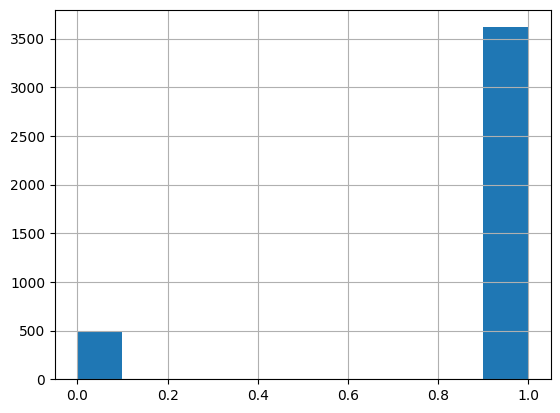

In [ ]:
df_e['Y'].hist()
#note: the data is unbalanced so we will need to upsample

### Upsample the Data

In [ ]:
#In the following line, we create a new dataframe by including only Retained=Y as this class has enough records
df_upsampled = df_e[df_e['Y']==1].copy() 

In [ ]:
df_upsampled.head()

,X1,X2,X3,X4,X5,Y
1,1,0,68,2002,1,1
2,1,0,56,2002,1,1
3,1,0,90,2002,1,1
4,1,0,45,2002,1,1
5,1,0,41,2002,1,1


<Axes: >

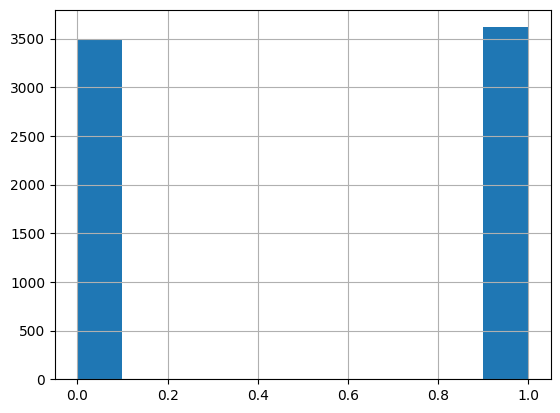

In [ ]:
df_upsampled = pd.concat([df_upsampled, resample(df_e[(df_e['Y']==0)], n_samples=3500)],axis=0)
df_upsampled = df_upsampled.reset_index(drop=True) #reset the index
df_upsampled['Y'].hist()

In [ ]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7117 entries, 0 to 7116
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      7117 non-null   int64
 1   X2      7117 non-null   int64
 2   X3      7117 non-null   int64
 3   X4      7117 non-null   int64
 4   X5      7117 non-null   int64
 5   Y       7117 non-null   int64
dtypes: int64(6)
memory usage: 333.7 KB


### Normalize the Data

In [ ]:
scaler = StandardScaler()
scaler.fit(df_upsampled.drop(columns='Y'))

data_scaled = scaler.transform(df_upsampled.drop(columns='Y'))
df_normal = pd.DataFrame(data_scaled, columns=df_upsampled.drop(columns='Y').columns)

## 2. Data Visualization [10 points]: 
Exploring the data visually, and analyze labels or data trends. This data visualization step helps you have a basic understanding of the data to define a reasonable problem statement.

The following code block creates a heatmap that displays the correlation between the features. The darker the color, the stronger the correlation.

<ipython-input-93-534790cd89b5>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<Axes: >

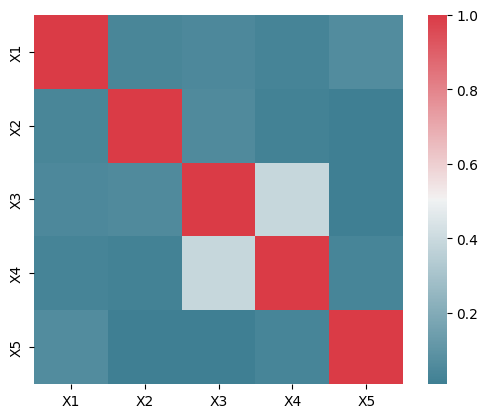

In [ ]:
corr=abs(df_normal.corr())

f, ax = plt.subplots()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

The following code block creates a heatmap that displays the correlation between the label and each feature. The darker the color, the stronger the correlation.

<Axes: >

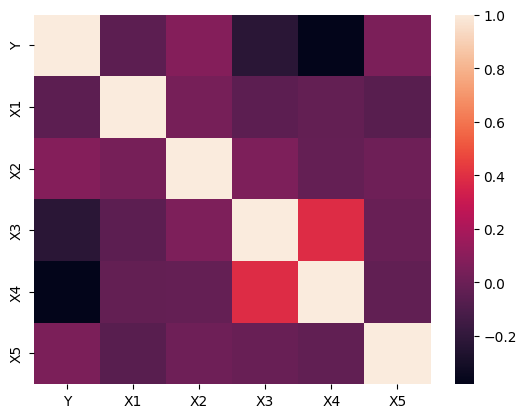

In [ ]:
df_final = pd.concat([df_upsampled['Y'], df_normal], axis=1)

# create a heatmap to visualize the correlation between features and the label
sns.heatmap(df_final.corr())

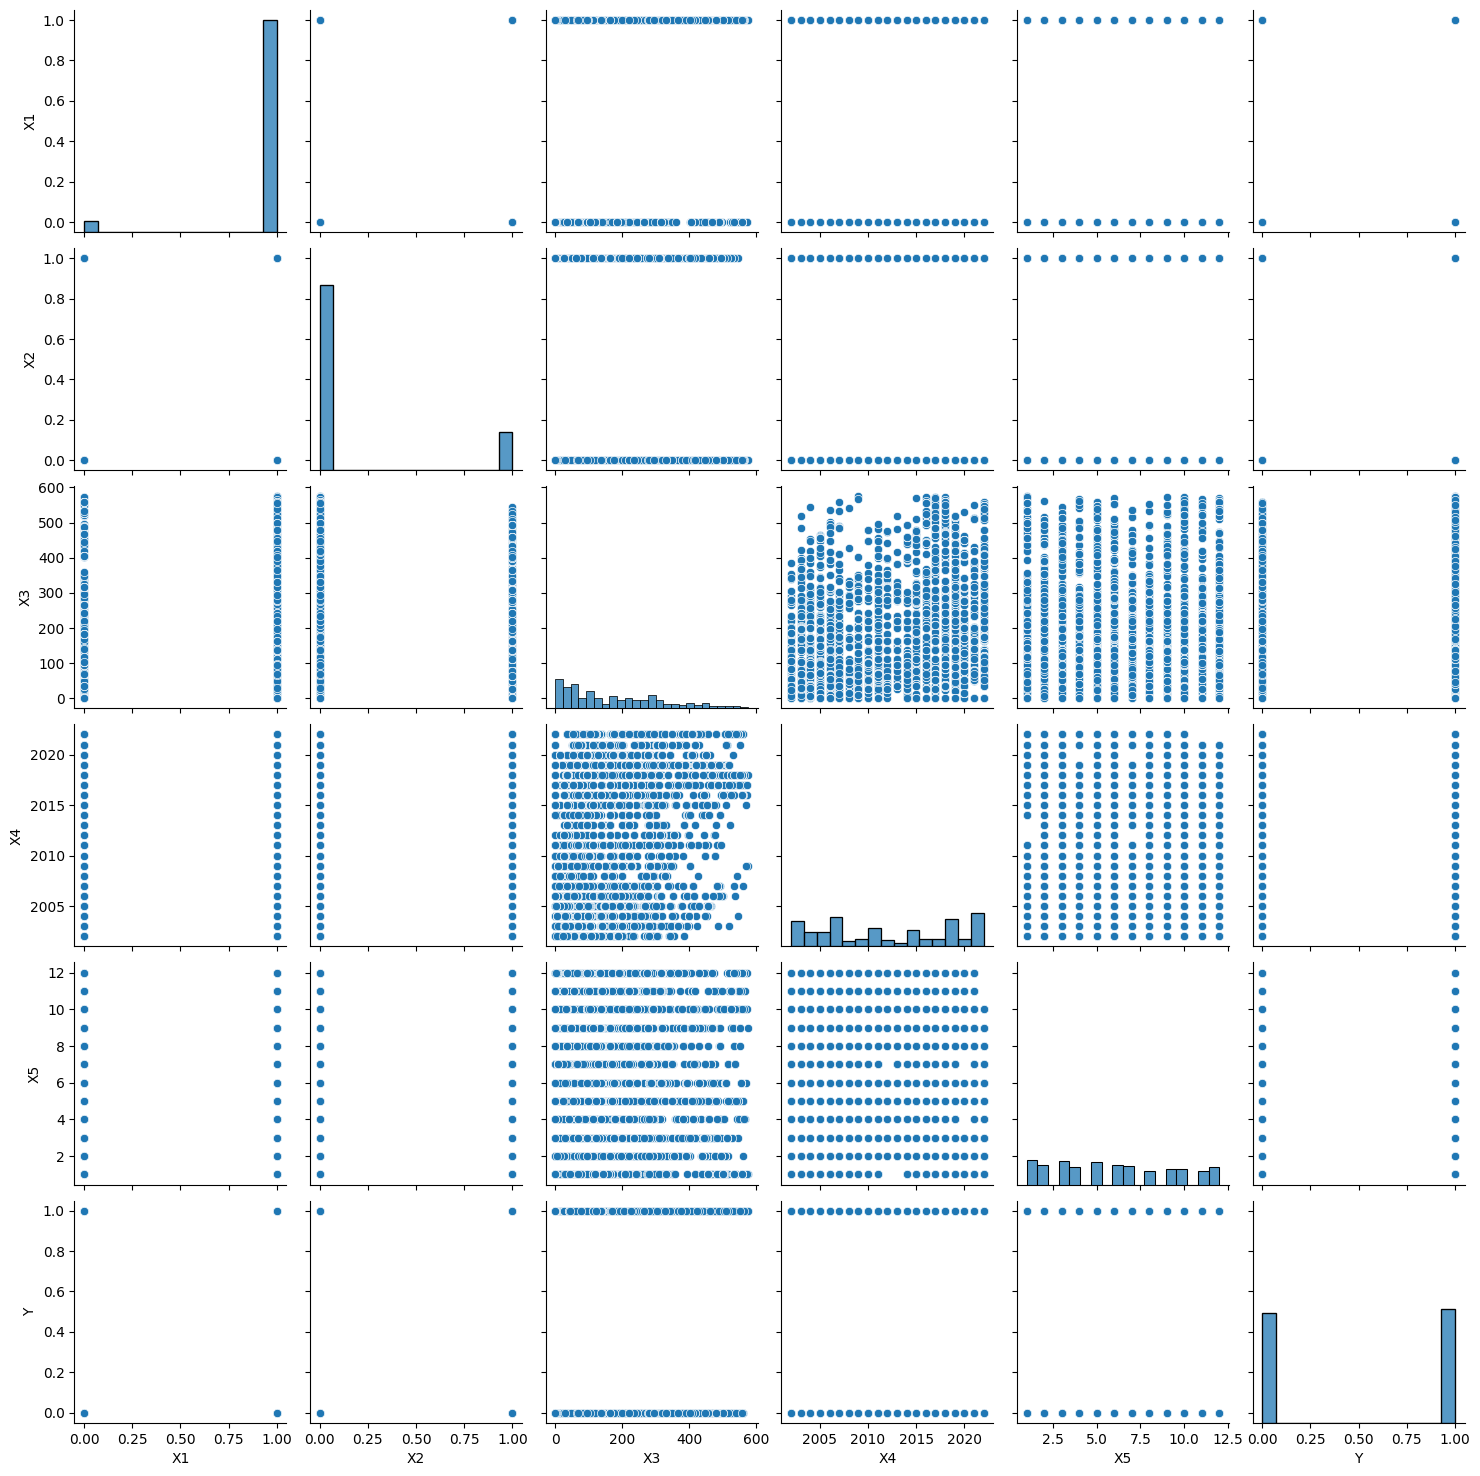

In [ ]:
sns.pairplot(df_upsampled[['X1','X2','X3', 'X4', 'X5', 'Y']])

## 3. Problem statement [10 points]: 

**The problem I am trying to solve is classification. **

Using the Dataset acquired from Govt of Pakistan's official record, I would like to solve a binary classification problem:

*   **Y** Column is the label and it is either Yes (1) or No (0) to represent whether a gift given to a government representative was retained by the person or not (i.e. deposted in the treasury)
*   And the rest of columns are features 
> *   X1: gender (Male or Female)
> *   X2: Department (Civil or Military)
> *   X3 is value of the gift (in Pakistani Rupees)
> *   X4 is month
> *   X5 is year

Therefore, we would like to train a model which takes the features and predicts whether a gift will be retained or deposited with the treasury!

My evaluation metric will be F1 Score.  

## 4. Features Selection/Extraction [10 points]: 
Looking at the histograms for our features below, we can see that X1 hardly ever changes, and presumably as a neglibible effect on the label. Therefore, we can drop this feature from our model. 
We will train the model(s) using X2, X3, X3, and X5 only.

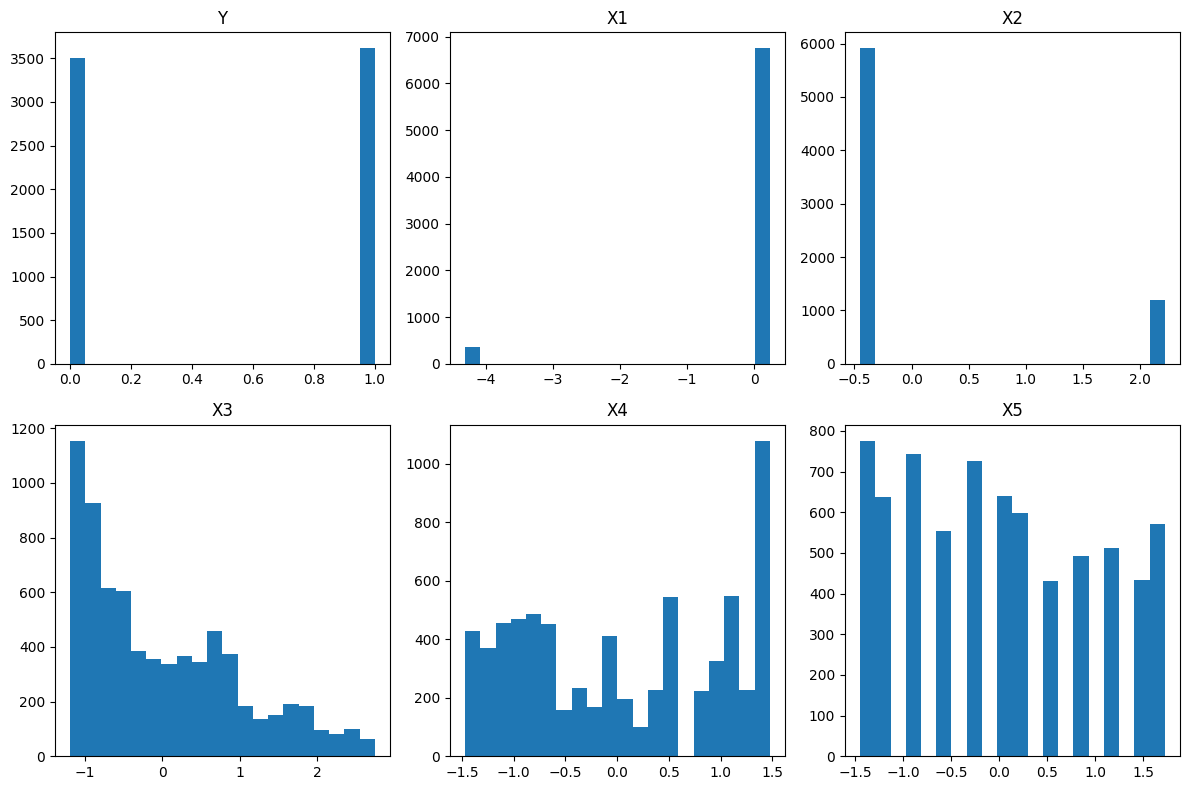

In [ ]:
# create a 2x3 grid of subplots for the histograms
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# loop through each column and create a histogram in the corresponding subplot
for i, col in enumerate(df_final.columns):
    ax = axs[i//3][i%3]
    ax.hist(df_final[col], bins=20)
    ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: >

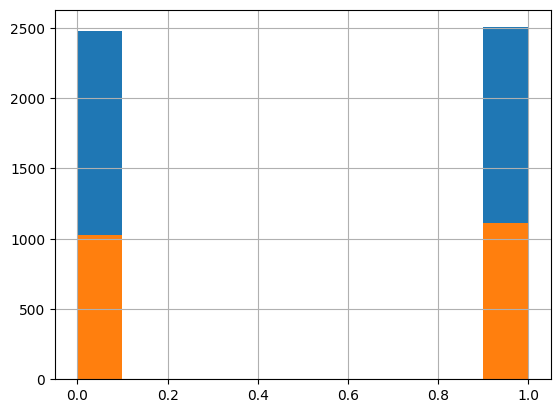

In [ ]:
# split data for train (70%) and test (30%), and drop X1
X_train, X_test, Y_train, Y_test = train_test_split(df_final.drop(['X1','Y'], axis=1), df_final['Y'], test_size=0.3, random_state=10)

Y_train.hist()
Y_test.hist()

## 5. Comparing different models (Features are fixed) [20 points]:
After step 4, you selected your features and now, you will train different models and compare their results. For example in the case of classification, someone can compare logistic regression, linear classifier, and MLP classifier. I should reiterate here that the final accuracy is not important! It is important that your comparison logic is correct and all evaluation metrics and graphs are included.

### Logistic Regression

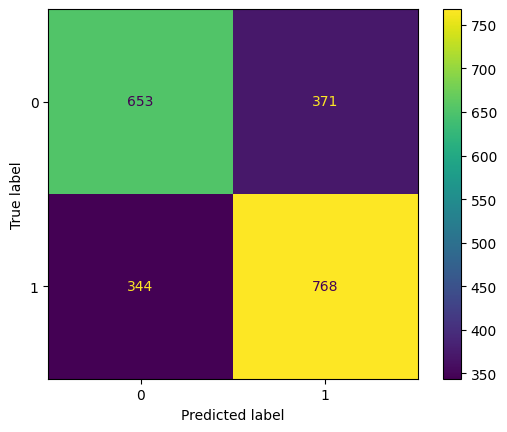

In [ ]:
model_LGR = LogisticRegression(max_iter=2000) #since the data has been balanced
model_LGR.fit(X_train,Y_train)

Y_test_predicted_LGR = model_LGR.predict(X_test)

#make confusion matrix
confusion_matrix_LGR = confusion_matrix(Y_test, Y_test_predicted_LGR)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_LGR).plot()

### Multi-layer Perceptron with Hidden Layer

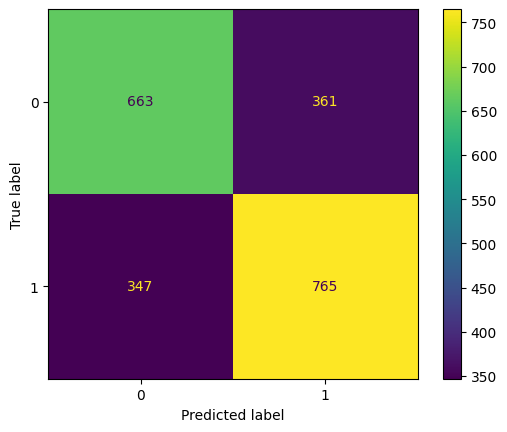

In [ ]:
MLP = MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(5),max_iter=5000)
MLP.fit(X_train, Y_train)

Y_test_predicted_MLP=MLP.predict(X_test)

confusion_matrix_MLP = confusion_matrix(Y_test, Y_test_predicted_MLP)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_MLP).plot()

### KNN

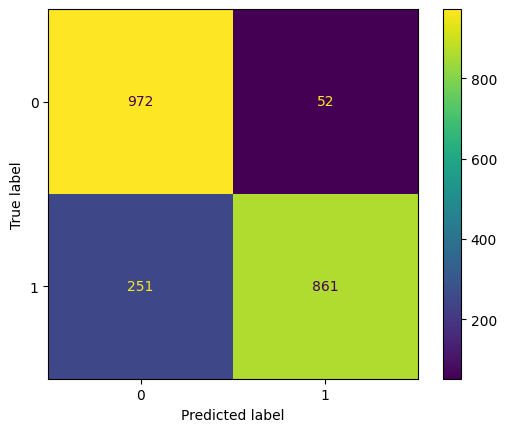

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5) # Using n=5
KNN.fit(X_train, Y_train)
Y_test_predicted_KNN=KNN.predict(X_test)

confusion_matrix_KNN = confusion_matrix(Y_test, Y_test_predicted_KNN)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_KNN).plot()

### Linear Support Vector Classification (SVC)

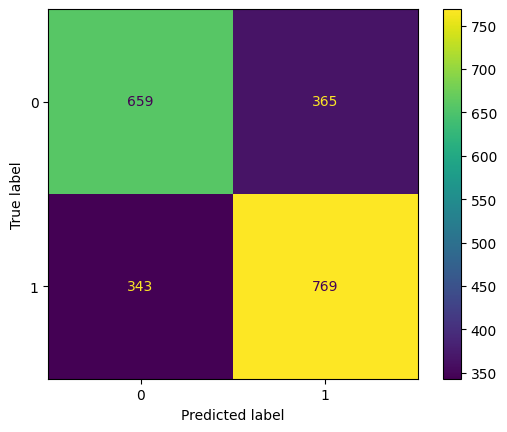

In [ ]:
svc_model = LinearSVC()
svc_model.fit(X_train, Y_train)
Y_test_predicted_SVC=svc_model.predict(X_test)

confusion_matrix_SVC = confusion_matrix(Y_test, Y_test_predicted_SVC)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_SVC).plot()

### Result Evaluation

As the results below show, KNN is the most suitable algorithm with the given features to predict whether or not a gift will be deposited with the treasury.

In [ ]:
print ('Score for Logistic Regression')
print(classification_report(Y_test, Y_test_predicted_LGR))
print ('Score for Multi-layer Perceptron - hidden layer')
print(classification_report(Y_test, Y_test_predicted_MLP))
print ('Score for KNN')
print(classification_report(Y_test, Y_test_predicted_KNN))
print ('Score for SVC')
print(classification_report(Y_test, Y_test_predicted_SVC))


Score for Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1024
           1       0.67      0.69      0.68      1112

    accuracy                           0.67      2136
   macro avg       0.66      0.66      0.66      2136
weighted avg       0.67      0.67      0.67      2136

Score for Multi-layer Perceptron - hidden layer
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1024
           1       0.68      0.69      0.68      1112

    accuracy                           0.67      2136
   macro avg       0.67      0.67      0.67      2136
weighted avg       0.67      0.67      0.67      2136

Score for KNN
              precision    recall  f1-score   support

           0       0.79      0.95      0.87      1024
           1       0.94      0.77      0.85      1112

    accuracy                           0.86      2136
   macro avg       0.87      0.86   

## 6. Unsupervised + Supervised [20 points]:  
After you compared different models in Step 5, you need to develop an Unsupervised/Supervised pipeline and apply it to your data.  

You need to first apply a clustering method like KMeans or SOM, group your data into clusters 
and then apply the regression/classification model for each cluster. 
You need to present your ensemble model result and try to improve the results you achieved in step 5. Improving the result is not always possible given the characteristics of the dataset selected but you need to document your effort.

###Step 1 - Unsupervised Learning using KMeans

In [ ]:
kmeans = KMeans(n_clusters=4,init='random') #use different init if needed.
# Fitting the input data
kmeans = kmeans.fit(X_train)
# Getting the cluster labels
clusters_assigned = kmeans.predict(X_train)
# Centroid values
centroids = kmeans.cluster_centers_
# replace each data point with the centroid of its assigned cluster
X_train_qnt = centroids[clusters_assigned]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Step 2 - Supervised Learning using Logistic Regression

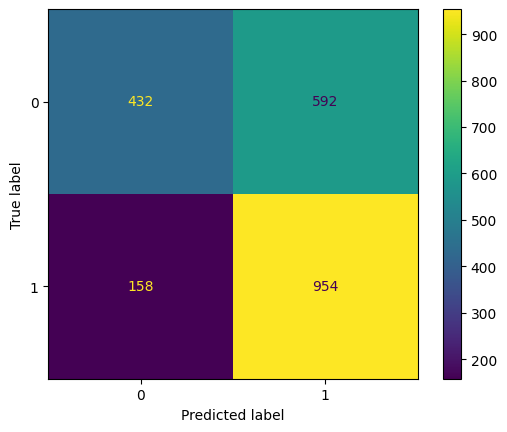

In [ ]:
LGR_model_2nd_layer = LogisticRegression(max_iter=1000)
LGR_model_2nd_layer.fit(X_train_qnt,Y_train)
LGR_model_2nd_layer_prediction=LGR_model_2nd_layer.predict(centroids[kmeans.predict(X_test)])

confusion_matrix_2nd_layer = confusion_matrix(Y_test, LGR_model_2nd_layer_prediction)
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2nd_layer).plot()


In [ ]:
print ('Score for Unsupervised Learning (Kmeans) with Logistic Regression (2nd layer)')
print(classification_report(Y_test, LGR_model_2nd_layer_prediction))

Score for Unsupervised Learning (Kmeans) with Logistic Regression (2nd layer)
              precision    recall  f1-score   support

           0       0.73      0.42      0.54      1024
           1       0.62      0.86      0.72      1112

    accuracy                           0.65      2136
   macro avg       0.67      0.64      0.63      2136
weighted avg       0.67      0.65      0.63      2136



## 7. Conclusion and result justification [10 points]: 
By combining Unsupervised with Supervised learning, we did not achieve a significant improvement - which could be because of the pecularities of the data.
Given the dataset/features available, we will stick with KNN based model, which has an accuracy of 85% in our case. 
Choosing a subset of features seems to have worked given a relatively high accuracy achieved during one model (KNN).

A key learning for me personally is to focus on the dataset, since I ended up spending a significant amount of time in importing and manipulating the data that was originally in PDF. However, I must say that I have learnt quite a bit about not only machine learning models but also pandas data manipulation including indexing and slicing of the dataframes!

Overall, developing a framework to apply machine learning on a dataset through this project seems like a great learning for dealing with future data science problems!